# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **12th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

3

: 

['Dominica']

,
 

4

: 

['Papua New Guinea', 'Tanzania', 'Myanmar']

,
 

5

: 

[

'Tunisia'

, 

'Antigua and Barbuda'

, 

'Fiji'

, 

'Uganda'

, 

'Belize'

,
     

'Trinidad and Tobago'

, 

'Jordan'

, 

'Libya'

, 

'Grenada'

, 

'Mauritius'

,
     

'Jamaica'

, 

'Seychelles'

, 

'Brunei'

]

,
 

6

: 

[

'Monaco'

, 

'Sao Tome and Principe'

, 

'Burundi'

, 

'Bahamas'

, 

'Cambodia'

,
     

'Guinea-Bissau'

, 

'Kosovo'

, 

'Ireland'

, 

'Gambia'

, 

'Yemen'

, 

'Lebanon'

,
     

'Namibia'

, 

'Central African Republic'

, 

'Kyrgyzstan'

, 

'Equatorial Guinea'

,
     

'Lesotho'

, 

'Mongolia'

, 

'Netherlands'

]

,
 

7

: 

[

'Philippines'

, 

'Costa Rica'

, 

'New Zealand'

, 

'Paraguay'

, 

'Rwanda'

,
     

'Ethiopia'

, 

'Liechtenstein'

, 

'Taiwan'

, 

'Syria'

, 

'Greece'

,
     

'Saint Vincent and the Grenadines'

, 

'Slovakia'

, 

'Croatia'

, 

'Eritrea'

,
     

'Zimbabwe'

, 

'Venezuela'

, 

'Iceland'

, 

'Kazakhstan'

, 

'San Marino'

, 

'Norway'

,
     

'Thailand'

, 

'Malta'

, 

'Guyana'

, 

'Cyprus'

, 

'Spain'

, 

'Botswana'

, 

'Colombia'

,
     

'Zambia'

, 

'Afghanistan'

, 

'Montenegro'

, 

'Malawi'

, 

'South Sudan'

,
     

'Australia'

, 

'Comoros'

, 

'Angola'

, 

'Vietnam'

]

,
 

8

: 

[

'Georgia'

, 

'Ghana'

, 

'Maldives'

, 

'Bhutan'

, 

'Nicaragua'

, 

'Morocco'

, 

'Niger'

,
     

'Sudan'

, 

'Mozambique'

, 

'Haiti'

, 

'Israel'

, 

'Nepal'

, 

'Guatemala'

, 

'Qatar'

,
     

'Argentina'

, 

'Kenya'

, 

'Cameroon'

, 

'Barbados'

, 

'Sri Lanka'

, 

'India'

,
     

'Hungary'

, 

'Slovenia'

, 

'South Africa'

, 

'Saint Lucia'

, 

'Czech Republic'

,
     

'Madagascar'

]

,
 

9

: 

[

'Tajikistan'

, 

'Cape Verde'

, 

'Andorra'

, 

'Indonesia'

, 

'Palestine'

, 

'Uruguay'

,
     

'Azerbaijan'

, 

'Suriname'

, 

'Liberia'

, 

'China'

, 

'Bermuda'

, 

'Somalia'

,
     

'Ecuador'

, 

'Finland'

, 

'Chad'

, 

'Mauritania'

, 

'Sierra Leone'

, 

'Germany'

,
     

'Romania'

, 

'Djibouti'

, 

'Iraq'

, 

'Congo'

, 

'Luxembourg'

, 

'El Salvador'

,
     

'Gabon'

, 

'Ukraine'

, 

'Benin'

, 

'Belarus'

, 

'Korea, South'

, 

'Japan'

, 

'Oman'

,
     

'Austria'

, 

'Singapore'

, 

'Pakistan'

, 

'Swaziland'

]

,
 

10

: 

[

'Mali'

, 

'Canada'

, 

'Chile'

, 

'Togo'

, 

'Lithuania'

, 

'Moldova'

, 

'Cuba'

,
      

'Albania'

, 

'Switzerland'

, 

'Senegal'

, 

'Saudi Arabia'

, 

'Panama'

,
      

'Uzbekistan'

, 

'Serbia'

, 

'Denmark'

, 

'Belgium'

, 

'Bosnia and Herzegovina'

,
      

'Bangladesh'

, 

'Malaysia'

, 

'Algeria'

, 

'Honduras'

]

,
 

11

: 

[

'Mexico'

, 

'Turkey'

, 

'Latvia'

, 

'Nigeria'

, 

'Bulgaria'

, 

'Kuwait'

, 

'Guinea'

,
      

'Bolivia'

, 

'Egypt'

, 

'Estonia'

, 

'Peru'

, 

'Macedonia'

, 

'Armenia'

,
      

'Dominican Republic'

, 

'Poland'

]

,
 

12

: 

[

'Portugal'

, 

'Italy'

, 

'United States'

, 

'Burkina Faso'

, 

'Bahrain'

, 

'Brazil'

,
      

'United Arab Emirates'

, 

'Iran'

]

,
 

13

: 

['Russia', 'France']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=12)
# The number of countries
len(analyser.countries)

10

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

12

: 

[

'Portugal'

, 

'Italy'

, 

'United States'

, 

'Burkina Faso'

, 

'Bahrain'

, 

'Brazil'

,
      

'United Arab Emirates'

, 

'Iran'

]

,
 

13

: 

['Russia', 'France']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  06May2020   330457362
        1st    Past  07May2020  16May2020   330457362
        2nd    Past  17May2020  26May2020   330457362
        3rd    Past  27May2020  04Jun2020   330457362
        4th    Past  05Jun2020  13Jun2020   330457362
        5th    Past  14Jun2020  23Jun2020   330457362
        6th    Past  24Jun2020  05Jul2020   330457362
        7th    Past  06Jul2020  17Jul2020   330457362
        8th    Past  18Jul2020  31Jul2020   330457362
        9th    Past  01Aug2020  14Aug2020   330457362
        10th   Past  15Aug2020  29Aug2020   330457362
        11th   Past  30Aug2020  13Sep2020   330457362
        12th   Past  14Sep2020  27Sep2020   330457362
France  0th    Past  12Feb2020  23Mar2020    68091467
        1st    Past  24Mar2020  02Apr2020    68091467
        2nd    Past  03Apr2020  12Apr2020    68091467
        3rd    Past  13Apr2020  20Apr2020    68091467
        4th    Past  21Apr2020  04May2020    68091467
        5th    Past  05May2020  26May2020    68091467
        6th    Past  27May2020  25Jun2020    68091467
        7th    Past  26Jun2020  22Jul2020    68091467
        8th    Past  23Jul2020  10Aug2020    68091467
        9th    Past  11Aug2020  27Aug2020    68091467
        10th   Past  28Aug2020  10Sep2020    68091467
        11th   Past  11Sep2020  18Sep2020    68091467
        12th   Past  19Sep2020  27Sep2020    68091467

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	BFA,  3rd phase (20Apr2020 - 03May2020): finished 1349 trials in 1 min  0 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 1374 trials in 1 min  0 sec

	BRA, 10th phase (03Sep2020 - 14Sep2020): finished 1331 trials in 1 min  0 sec

	IRN,  1st phase (30Mar2020 - 17Apr2020): finished 1328 trials in 1 min  0 sec

	ITA,  7th phase (22May2020 - 13Jun2020): finished  513 trials in 0 min 20 sec

	BRA,  9th phase (25Aug2020 - 02Sep2020): finished  338 trials in 0 min 10 sec

	FRA,  2nd phase (03Apr2020 - 12Apr2020): finished 1463 trials in 1 min  0 sec

	RUS,  5th phase (14Jun2020 - 23Jun2020): finished 1465 trials in 1 min  0 sec

	ARE,  3rd phase (25May2020 - 06Jun2020): finished 1462 trials in 1 min  0 sec

	BHR, 10th phase (07Sep2020 - 16Sep2020): finished  185 trials in 0 min  5 sec

	FRA, 10th phase (28Aug2020 - 10Sep2020): finished  638 trials in 0 min 20 sec

	ITA, 11th phase (15Sep2020 - 27Sep2020): finished  177 trials in 0 min  5 sec

	ARE,  2nd phase (15May2020 - 24May2020): finished 1549 trials in 1 min  0 sec

	BFA,  0th phase (21Mar2020 - 31Mar2020): finished 1540 trials in 1 min  0 sec

	ARE,  4th phase (07Jun2020 - 20Jun2020): finished 1525 trials in 1 min  0 sec

	ITA,  3rd phase (09Apr2020 - 18Apr2020): finished  341 trials in 0 min 10 sec

	PRT, 11th phase (17Sep2020 - 27Sep2020): finished 1505 trials in 1 min  0 sec

	PRT,  7th phase (21Jul2020 - 07Aug2020): finished 1500 trials in 1 min  0 sec

	PRT,  8th phase (08Aug2020 - 25Aug2020): finished 1458 trials in 1 min  0 sec

	ARE,  6th phase (04Jul2020 - 20Jul2020): finished 1463 trials in 1 min  0 sec

	IRN, 10th phase (28Aug2020 - 13Sep2020): finished 1444 trials in 1 min  0 sec

	PRT,  0th phase (14Mar2020 - 27Apr2020): finished 1405 trials in 1 min  0 sec

	BRA,  2nd phase (14Jun2020 - 26Jun2020): finished 1155 trials in 0 min 45 sec

	PRT,  5th phase (26Jun2020 - 07Jul2020): finished 1465 trials in 1 min  0 sec

	BFA,  5th phase (21May2020 - 23Jun2020): finished 1434 trials in 1 min  0 sec

	BFA,  9th phase (25Aug2020 - 10Sep2020): finished 1447 trials in 1 min  0 sec

	FRA,  9th phase (11Aug2020 - 27Aug2020): finished  707 trials in 0 min 25 sec

	PRT,  3rd phase (31May2020 - 12Jun2020): finished 1451 trials in 1 min  0 sec

	ITA,  8th phase (14Jun2020 - 29Jul2020): finished  686 trials in 0 min 25 sec

	ARE,  1st phase (27Apr2020 - 14May2020): finished 1424 trials in 1 min  0 sec

	RUS,  4th phase (05Jun2020 - 13Jun2020): finished 1434 trials in 1 min  0 sec

	PRT, 10th phase (08Sep2020 - 16Sep2020): finished 1453 trials in 1 min  0 sec

	USA, 10th phase (31Aug2020 - 13Sep2020): finished  712 trials in 0 min 25 sec

	IRN,  8th phase (28Jul2020 - 11Aug2020): finished  587 trials in 0 min 20 sec

	USA,  3rd phase (06Jun2020 - 25Jun2020): finished 1448 trials in 1 min  0 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1455 trials in 1 min  0 sec

	ARE,  5th phase (21Jun2020 - 03Jul2020): finished  302 trials in 0 min 10 sec

	FRA,  4th phase (21Apr2020 - 04May2020): finished 1399 trials in 1 min  0 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 1386 trials in 1 min  0 sec

	USA, 11th phase (14Sep2020 - 27Sep2020): finished  760 trials in 0 min 30 sec

	ITA,  2nd phase (29Mar2020 - 08Apr2020): finished 1389 trials in 1 min  0 sec

	BHR,  7th phase (27Jul2020 - 09Aug2020): finished  299 trials in 0 min 10 sec

	BHR,  1st phase (11May2020 - 01Jun2020): finished 1373 trials in 1 min  0 sec

	FRA,  1st phase (24Mar2020 - 02Apr2020): finished 1357 trials in 1 min  0 sec

	BHR,  5th phase (05Jul2020 - 14Jul2020): finished 1267 trials in 1 min  0 sec

	ITA,  9th phase (30Jul2020 - 28Aug2020): finished 1096 trials in 1 min  0 sec

	BRA,  7th phase (06Aug2020 - 13Aug2020): finished  356 trials in 0 min 25 sec

	RUS,  1st phase (07May2020 - 16May2020): finished  873 trials in 1 min  0 sec

	RUS,  2nd phase (17May2020 - 26May2020): finished  857 trials in 1 min  0 sec

	USA,  5th phase (08Jul2020 - 17Jul2020): finished  306 trials in 0 min 20 sec

	BRA,  0th phase (16Mar2020 - 26May2020): finished  835 trials in 1 min  0 sec

	BFA,  8th phase (11Aug2020 - 24Aug2020): finished  663 trials in 0 min 40 sec

	ITA, 10th phase (29Aug2020 - 14Sep2020): finished  196 trials in 0 min 10 sec

	ARE,  0th phase (12Feb2020 - 26Apr2020): finished  872 trials in 1 min  0 sec

	BRA,  3rd phase (27Jun2020 - 07Jul2020): finished  925 trials in 1 min  0 sec

	ARE, 10th phase (10Sep2020 - 18Sep2020): finished  234 trials in 0 min 15 sec

	ARE,  7th phase (21Jul2020 - 15Aug2020): finished  820 trials in 1 min  0 sec

	ITA,  5th phase (01May2020 - 09May2020): finished  573 trials in 0 min 45 sec

	IRN,  4th phase (01Jun2020 - 15Jun2020): finished  648 trials in 1 min  1 sec

	IRN,  5th phase (16Jun2020 - 29Jun2020): finished  647 trials in 1 min  1 sec

	ARE,  8th phase (16Aug2020 - 01Sep2020): finished  465 trials in 0 min 40 sec

	BHR,  2nd phase (02Jun2020 - 13Jun2020): finished  778 trials in 1 min  1 sec

	IRN,  9th phase (12Aug2020 - 27Aug2020): finished  495 trials in 0 min 30 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished  841 trials in 1 min  0 sec

	ITA,  6th phase (10May2020 - 21May2020): finished  360 trials in 0 min 25 sec

	BHR,  8th phase (10Aug2020 - 24Aug2020): finished  143 trials in 0 min 10 sec

	FRA,  5th phase (05May2020 - 26May2020): finished  831 trials in 1 min  0 sec

	USA,  8th phase (07Aug2020 - 18Aug2020): finished  549 trials in 0 min 40 sec

	IRN,  2nd phase (18Apr2020 - 13May2020): finished  251 trials in 0 min 15 sec

	ARE,  9th phase (02Sep2020 - 09Sep2020): finished  848 trials in 1 min  0 sec

	BRA,  5th phase (21Jul2020 - 28Jul2020): finished  869 trials in 1 min  0 sec

	RUS,  8th phase (18Jul2020 - 31Jul2020): finished  854 trials in 1 min  0 sec

	BRA,  6th phase (29Jul2020 - 05Aug2020): finished  797 trials in 1 min  0 sec

	BHR,  0th phase (06Mar2020 - 10May2020): finished  645 trials in 1 min  1 sec

	BRA,  8th phase (14Aug2020 - 24Aug2020): finished  692 trials in 1 min  0 sec

	BFA,  7th phase (23Jul2020 - 10Aug2020): finished  676 trials in 1 min  0 sec

	BFA,  6th phase (24Jun2020 - 22Jul2020): finished  714 trials in 1 min  1 sec

	USA,  6th phase (18Jul2020 - 27Jul2020): finished  371 trials in 0 min 25 sec

	RUS, 11th phase (30Aug2020 - 13Sep2020): finished  746 trials in 0 min 50 sec

	ITA,  4th phase (19Apr2020 - 30Apr2020): finished  140 trials in 0 min  5 sec

	BFA,  4th phase (04May2020 - 20May2020): finished  808 trials in 1 min  0 sec

	USA,  2nd phase (12May2020 - 05Jun2020): finished  862 trials in 1 min  0 sec

	IRN,  3rd phase (14May2020 - 31May2020): finished  316 trials in 0 min 15 sec

	RUS, 10th phase (15Aug2020 - 29Aug2020): finished 1075 trials in 1 min  0 sec

	BHR,  3rd phase (14Jun2020 - 24Jun2020): finished 1112 trials in 1 min  0 sec

	RUS,  9th phase (01Aug2020 - 14Aug2020): finished 1088 trials in 1 min  0 sec

	PRT,  4th phase (13Jun2020 - 25Jun2020): finished 1038 trials in 1 min  0 sec

	IRN,  7th phase (14Jul2020 - 27Jul2020): finished  117 trials in 0 min  5 sec

	BFA, 11th phase (19Sep2020 - 27Sep2020): finished 1061 trials in 1 min  0 sec

	RUS,  3rd phase (27May2020 - 04Jun2020): finished 1112 trials in 1 min  0 sec

	PRT,  6th phase (08Jul2020 - 20Jul2020): finished 1094 trials in 1 min  0 sec

	BHR,  9th phase (25Aug2020 - 06Sep2020): finished 1081 trials in 1 min  0 sec

	USA,  9th phase (19Aug2020 - 30Aug2020): finished  668 trials in 0 min 30 sec

	FRA,  3rd phase (13Apr2020 - 20Apr2020): finished 1073 trials in 1 min  0 sec

	BFA,  1st phase (01Apr2020 - 09Apr2020): finished 1065 trials in 1 min  0 sec

	PRT,  9th phase (26Aug2020 - 07Sep2020): finished 1063 trials in 1 min  0 sec

	BHR,  6th phase (15Jul2020 - 26Jul2020): finished  402 trials in 0 min 20 sec

	BFA, 10th phase (11Sep2020 - 18Sep2020): finished 1237 trials in 1 min  0 sec

	USA,  1st phase (20Apr2020 - 11May2020): finished 1247 trials in 1 min  0 sec

	BFA,  2nd phase (10Apr2020 - 19Apr2020): finished 1257 trials in 1 min  0 sec

	PRT,  1st phase (28Apr2020 - 14May2020): finished 1276 trials in 1 min  0 sec

	BRA,  1st phase (27May2020 - 13Jun2020): finished 1267 trials in 1 min  0 sec

	RUS,  7th phase (06Jul2020 - 17Jul2020): finished 1285 trials in 1 min  0 sec

	FRA,  7th phase (26Jun2020 - 22Jul2020): finished  397 trials in 0 min 15 sec

	RUS,  6th phase (24Jun2020 - 05Jul2020): finished 1246 trials in 1 min  0 sec

	PRT,  2nd phase (15May2020 - 30May2020): finished 1272 trials in 1 min  0 sec

	USA,  0th phase (09Feb2020 - 19Apr2020): finished 1207 trials in 1 min  0 sec

	USA,  7th phase (28Jul2020 - 06Aug2020): finished  278 trials in 0 min 10 sec

	FRA,  0th phase (12Feb2020 - 23Mar2020): finished 1339 trials in 1 min  0 sec

	FRA,  6th phase (27May2020 - 25Jun2020): finished 1444 trials in 1 min  0 sec

	BHR,  4th phase (25Jun2020 - 04Jul2020): finished  992 trials in 0 min 35 sec

	IRN,  6th phase (30Jun2020 - 13Jul2020): finished  162 trials in 0 min  5 sec

Completed optimization. Total: 24 min 10 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt  \
Country Phase                                                         
Russia  0th    Past  12Feb2020  06May2020   330457362  SIR-F   0.02   
        1st    Past  07May2020  16May2020   330457362  SIR-F   2.58   
        2nd    Past  17May2020  26May2020   330457362  SIR-F   1.59   
        3rd    Past  27May2020  04Jun2020   330457362  SIR-F   1.03   
        4th    Past  05Jun2020  13Jun2020   330457362  SIR-F   1.25   
        5th    Past  14Jun2020  23Jun2020   330457362  SIR-F   0.82   
        6th    Past  24Jun2020  05Jul2020   330457362  SIR-F   0.77   
        7th    Past  06Jul2020  17Jul2020   330457362  SIR-F   0.73   
        8th    Past  18Jul2020  31Jul2020   330457362  SIR-F   0.74   
        9th    Past  01Aug2020  14Aug2020   330457362  SIR-F   0.76   
        10th   Past  15Aug2020  29Aug2020   330457362  SIR-F   0.66   
        11th   Past  30Aug2020  13Sep2020   330457362  SIR-F   0.88   
        12th   Past  14Sep2020  27Sep2020   330457362      -      -   
France  0th    Past  12Feb2020  23Mar2020    68091467  SIR-F   5.01   
        1st    Past  24Mar2020  02Apr2020    68091467  SIR-F   3.56   
        2nd    Past  03Apr2020  12Apr2020    68091467  SIR-F   1.73   
        3rd    Past  13Apr2020  20Apr2020    68091467  SIR-F   1.15   
        4th    Past  21Apr2020  04May2020    68091467  SIR-F   0.87   
        5th    Past  05May2020  26May2020    68091467  SIR-F    0.7   
        6th    Past  27May2020  25Jun2020    68091467  SIR-F   1.39   
        7th    Past  26Jun2020  22Jul2020    68091467  SIR-F   3.19   
        8th    Past  23Jul2020  10Aug2020    68091467      -      -   
        9th    Past  11Aug2020  27Aug2020    68091467  SIR-F  16.42   
        10th   Past  28Aug2020  10Sep2020    68091467  SIR-F   29.4   
        11th   Past  11Sep2020  18Sep2020    68091467      -      -   
        12th   Past  19Sep2020  27Sep2020    68091467      -      -   

                     theta        kappa         rho        sigma  tau  \
Country Phase                                                           
Russia  0th       0.602763     0.544883   0.0340813   0.00229851  360   
        1st     0.00180556  9.34529e-05   0.0131342   0.00499299  360   
        2nd    0.000437993   9.8046e-05  0.00703411   0.00431289  360   
        3rd    0.000708362  0.000116581  0.00547912   0.00519557  360   
        4th    0.000825421  8.45185e-05  0.00464652   0.00362314  360   
        5th    0.000348462  7.90578e-05  0.00346657    0.0041384  360   
        6th      0.0048605  4.57342e-05  0.00256363   0.00328876  360   
        7th      0.0235908  1.03671e-05  0.00226026   0.00301415  360   
        8th      0.0188284  5.96163e-05   0.0018079   0.00232196  360   
        9th     0.00141602  3.12519e-05  0.00146767   0.00188923  360   
        10th      0.125636  6.92046e-05  0.00128443   0.00163335  360   
        11th    0.00136719  2.49714e-05  0.00134621    0.0014996  360   
        12th             -            -           -            -    -   
France  0th      0.0167899  0.000334095   0.0200938   0.00361132  360   
        1st      0.0698239  0.000796724   0.0349468   0.00832317  360   
        2nd       0.207758  0.000828625   0.0189201    0.0078155  360   
        3rd       0.295127  0.000334877   0.0113781   0.00666102  360   
        4th        0.16343  0.000760857  0.00576398   0.00475135  360   
        5th       0.040658  0.000651527  0.00230984   0.00251812  360   
        6th        0.10994  1.88018e-05  0.00170617   0.00107227  360   
        7th      0.0193772  4.82376e-05  0.00253457  0.000731295  360   
        8th              -            -           -            -    -   
        9th    0.000139493  1.80742e-06   0.0073174  0.000443826  360   
        10th   0.000128353  1.80784e-06  0.00928194  0.000313911  360   
        11th             -            -           -            -    -   
        12th             -            -           -    

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-14,Portugal,0.0169902,0.000337679,0.0349739,0.000677149,0.017,740,7,369,...,0,0,0,0,0,3,2,1,2,32.41
1,2020-03-14,Portugal,0.0169902,0.000337679,0.0349739,0.000677149,0.017,740,7,369,...,0,0,0,0,0,3,2,1,2,32.41
2,2020-03-14,Portugal,0.0169902,0.000337679,0.0349739,0.000677149,0.017,740,7,369,...,0,0,0,0,0,3,2,1,2,32.41
3,2020-03-14,Portugal,0.0169902,0.000337679,0.0349739,0.000677149,0.017,740,7,369,...,0,0,0,0,0,3,2,1,2,32.41
4,2020-03-14,Portugal,0.0169902,0.000337679,0.0349739,0.000677149,0.017,740,7,369,...,0,0,0,0,0,3,2,1,2,32.41


### $Rt$: Reprodcution number $\mathrm{[-]}$

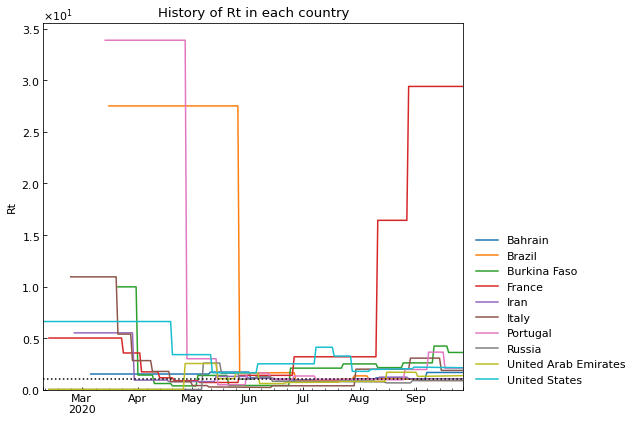

Country,Bahrain,Brazil,Burkina Faso,France,Iran,Italy,Portugal,Russia,United Arab Emirates,United States
Date,,,,,,,,,,
2020-09-23,1.67,0.9,3.61,29.4,1.06,1.87,2.09,0.88,1.36,2.13
2020-09-24,1.67,0.9,3.61,29.4,1.06,1.87,2.09,0.88,1.36,2.13
2020-09-25,1.67,0.9,3.61,29.4,1.06,1.87,2.09,0.88,1.36,2.13
2020-09-26,1.67,0.9,3.61,29.4,1.06,1.87,2.09,0.88,1.36,2.13
2020-09-27,1.67,0.9,3.61,29.4,1.06,1.87,2.09,0.88,1.36,2.13


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

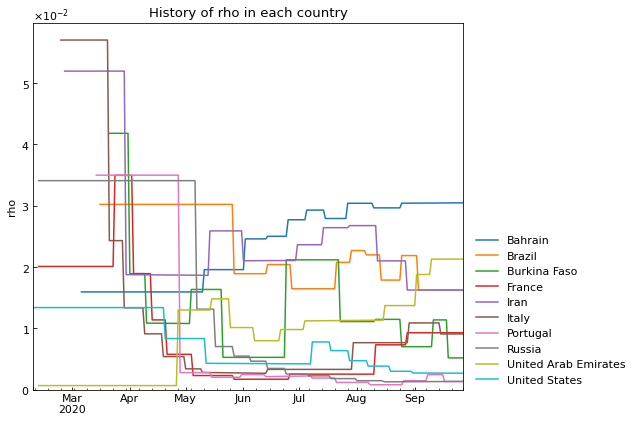

Country,Bahrain,Brazil,Burkina Faso,France,Iran,Italy,Portugal,Russia,United Arab Emirates,United States
Date,,,,,,,,,,
2020-09-23,0.030466,0.016262,0.005187,0.009282,0.016246,0.009085,0.001343,0.001346,0.021294,0.00269
2020-09-24,0.030466,0.016262,0.005187,0.009282,0.016246,0.009085,0.001343,0.001346,0.021294,0.00269
2020-09-25,0.030466,0.016262,0.005187,0.009282,0.016246,0.009085,0.001343,0.001346,0.021294,0.00269
2020-09-26,0.030466,0.016262,0.005187,0.009282,0.016246,0.009085,0.001343,0.001346,0.021294,0.00269
2020-09-27,0.030466,0.016262,0.005187,0.009282,0.016246,0.009085,0.001343,0.001346,0.021294,0.00269


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

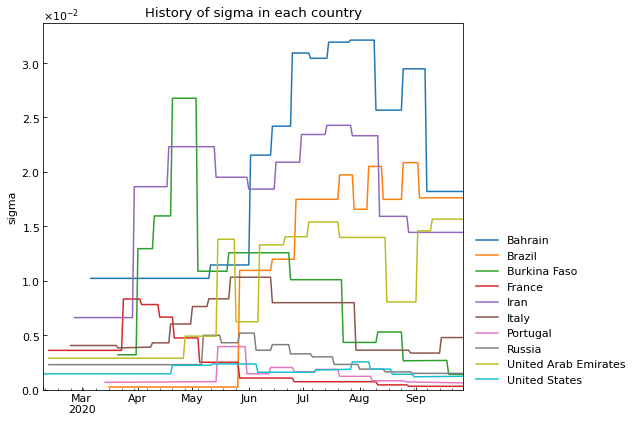

Country,Bahrain,Brazil,Burkina Faso,France,Iran,Italy,Portugal,Russia,United Arab Emirates,United States
Date,,,,,,,,,,
2020-09-23,0.018195,0.017609,0.001416,0.000314,0.01444,0.004785,0.000623,0.0015,0.015657,0.001237
2020-09-24,0.018195,0.017609,0.001416,0.000314,0.01444,0.004785,0.000623,0.0015,0.015657,0.001237
2020-09-25,0.018195,0.017609,0.001416,0.000314,0.01444,0.004785,0.000623,0.0015,0.015657,0.001237
2020-09-26,0.018195,0.017609,0.001416,0.000314,0.01444,0.004785,0.000623,0.0015,0.015657,0.001237
2020-09-27,0.018195,0.017609,0.001416,0.000314,0.01444,0.004785,0.000623,0.0015,0.015657,0.001237


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

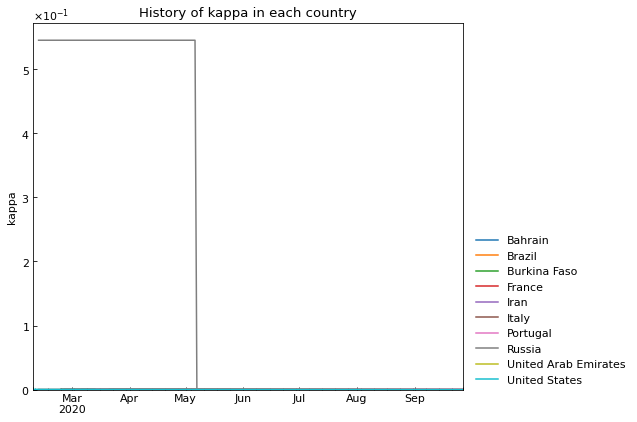

Country,Bahrain,Brazil,Burkina Faso,France,Iran,Italy,Portugal,Russia,United Arab Emirates,United States
Date,,,,,,,,,,
2020-09-23,0.000068,0.000057,0.000021,0.000002,0.000636,0.000079,0.000011,0.000025,0.000002,0.000025
2020-09-24,0.000068,0.000057,0.000021,0.000002,0.000636,0.000079,0.000011,0.000025,0.000002,0.000025
2020-09-25,0.000068,0.000057,0.000021,0.000002,0.000636,0.000079,0.000011,0.000025,0.000002,0.000025
2020-09-26,0.000068,0.000057,0.000021,0.000002,0.000636,0.000079,0.000011,0.000025,0.000002,0.000025
2020-09-27,0.000068,0.000057,0.000021,0.000002,0.000636,0.000079,0.000011,0.000025,0.000002,0.000025


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

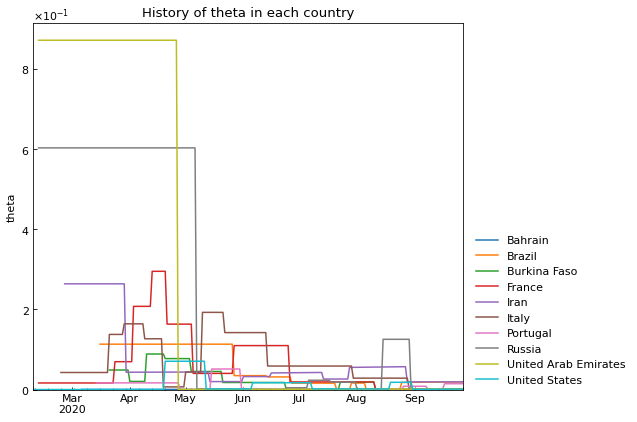

Country,Bahrain,Brazil,Burkina Faso,France,Iran,Italy,Portugal,Russia,United Arab Emirates,United States
Date,,,,,,,,,,
2020-09-23,0.000806,0.019495,0.000688,0.000128,0.019502,0.001204,0.014872,0.001367,0.001706,0.001492
2020-09-24,0.000806,0.019495,0.000688,0.000128,0.019502,0.001204,0.014872,0.001367,0.001706,0.001492
2020-09-25,0.000806,0.019495,0.000688,0.000128,0.019502,0.001204,0.014872,0.001367,0.001706,0.001492
2020-09-26,0.000806,0.019495,0.000688,0.000128,0.019502,0.001204,0.014872,0.001367,0.001706,0.001492
2020-09-27,0.000806,0.019495,0.000688,0.000128,0.019502,0.001204,0.014872,0.001367,0.001706,0.001492


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45898 entries, 0 to 46023
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 45898 non-null  datetime64[ns]
 1   Country                              45898 non-null  object        
 2   Rt                                   45898 non-null  float64       
 3   theta                                45898 non-null  float64       
 4   kappa                                45898 non-null  float64       
 5   rho                                  45898 non-null  float64       
 6   sigma                                45898 non-null  float64       
 7   School_closing                       45898 non-null  int64         
 8   Workplace_closing                    45898 non-null  int64         
 9   Cancel_events                        45898 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.263060,-0.239707,0.107175,-0.215948,-0.038662,0.056400,-0.026996,-0.034079,-0.145019,-0.225019,-0.151393,-0.170166,-0.008015,-0.064260,-0.167358,-0.088314
theta,-0.263060,1.000000,0.968432,0.750497,-0.038775,-0.198249,-0.120672,-0.292713,-0.293964,-0.265353,0.162464,-0.048432,0.198971,-0.337028,-0.360942,0.027356,-0.125381
kappa,-0.239707,0.968432,1.000000,0.770215,-0.097344,-0.224045,-0.153587,-0.312523,-0.287572,-0.267209,0.156102,-0.054203,0.221523,-0.360860,-0.312524,0.004312,-0.157313
rho,0.107175,0.750497,0.770215,1.000000,0.072797,-0.146630,-0.092162,-0.349929,-0.315772,-0.322403,0.095987,-0.132596,0.043406,-0.382874,-0.451136,-0.119950,-0.167174
sigma,-0.215948,-0.038775,-0.097344,0.072797,1.000000,0.203019,0.051331,0.074879,-0.126982,-0.032746,0.023432,-0.099835,-0.052705,0.092720,-0.127519,0.177384,0.099191
School_closing,-0.038662,-0.198249,-0.224045,-0.146630,0.203019,1.000000,0.733186,0.699969,0.650459,0.567939,0.557838,0.527324,0.424855,0.689436,0.491258,0.260003,0.805906
Workplace_closing,0.056400,-0.120672,-0.153587,-0.092162,0.051331,0.733186,1.000000,0.719469,0.765808,0.680972,0.665865,0.647298,0.474250,0.778847,0.492025,0.324739,0.891903
Cancel_events,-0.026996,-0.292713,-0.312523,-0.349929,0.074879,0.699969,0.719469,1.000000,0.814321,0.526707,0.518455,0.617812,0.539881,0.895335,0.661081,0.612138,0.850333
Gatherings_restrictions,-0.034079,-0.293964,-0.287572,-0.315772,-0.126982,0.650459,0.765808,0.814321,1.000000,0.765026,0.647979,0.744063,0.581611,0.831746,0.708091,0.399930,0.881040
Transport_closing,-0.145019,-0.265353,-0.267209,-0.322403,-0.032746,0.567939,0.680972,0.526707,0.765026,1.000000,0.654763,0.732023,0.457693,0.570618,0.578256,0.146536,0.761516


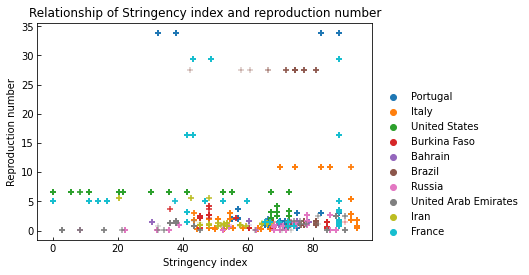

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()